In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = 'Lagos_flood.xlsx'
lagos_flood_data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(lagos_flood_data.head())

# Check for missing values
print(lagos_flood_data.isnull().sum())

# Fill or drop missing values as appropriate
lagos_flood_data = lagos_flood_data.fillna(method='ffill')

lagos_flood_data = lagos_flood_data.ffill()  # Forward fill missing values
# Or
lagos_flood_data = lagos_flood_data.bfill()  # Backward fill missing values

# Set the datetime column as the index
datetime_column = 'datetime'  # Replace with actual datetime column name
lagos_flood_data.set_index(datetime_column, inplace=True)

# Feature Engineering: Create a binary target variable based on the 'preci' threshold
threshold = 100  # Example threshold value for precipitation
lagos_flood_data['FloodEvent'] = (lagos_flood_data['precip'] > threshold).astype(int)

# Feature selection (only 'preci' is used here as a feature)
features = ['precip']
target = 'FloodEvent'

# Split the data into training and testing sets
X = lagos_flood_data[features]
y = lagos_flood_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Predict future flood events
# Example: Assuming future_data contains future 'preci' values
future_data = pd.DataFrame({'precip': [105, 85, 120, 95]})  # Example future data
future_predictions = model.predict(future_data)

# Interpret the predictions
print(future_predictions)


    name   datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  Lagos 2014-01-01     32.0     23.0  27.9          37.9          23.0   
1  Lagos 2014-01-02     30.5     23.8  26.1          36.2          23.8   
2  Lagos 2014-01-03     32.8     24.0  27.2          41.9          24.0   
3  Lagos 2014-01-04     32.5     23.0  26.7          38.3          23.0   
4  Lagos 2014-01-05     31.0     22.0  26.1          37.7          22.0   

   feelslike   dew  humidity  ...  uvindex  severerisk              sunrise  \
0       31.1  23.2      76.0  ...        7         NaN  2014-01-01T06:57:21   
1       27.4  22.1      79.3  ...        8         NaN  2014-01-02T06:57:47   
2       30.0  24.6      86.9  ...        7         NaN  2014-01-03T06:58:11   
3       28.6  23.1      81.9  ...        7         NaN  2014-01-04T06:58:36   
4       27.9  22.1      79.1  ...        8         NaN  2014-01-05T06:58:59   

                sunset  moonphase              conditions  \
0  2014-01-01

C:\Users\Admin\AppData\Local\Temp\ipykernel_13580\4087760784.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lagos_flood_data = lagos_flood_data.fillna(method='ffill')


In [2]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Start timing the entire script
start_time = time.time()

# Load the dataset
file_path = 'Lagos_flood.xlsx'
lagos_flood_data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(lagos_flood_data.head())

# Check for missing values
print(lagos_flood_data.isnull().sum())

# Fill or drop missing values as appropriate
lagos_flood_data = lagos_flood_data.ffill()

# Set the datetime column as the index
datetime_column = 'datetime'  # Replace with actual datetime column name
lagos_flood_data.set_index(datetime_column, inplace=True)

# Feature Engineering: Create a binary target variable based on the 'preci' threshold
threshold = 100  # Example threshold value for precipitation
lagos_flood_data['FloodEvent'] = (lagos_flood_data['precip'] > threshold).astype(int)

# Feature selection (only 'preci' is used here as a feature)
features = ['precip']
target = 'FloodEvent'

# Split the data into training and testing sets
split_start_time = time.time()
X = lagos_flood_data[features]
y = lagos_flood_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
split_end_time = time.time()

print(f"Data splitting took {split_end_time - split_start_time} seconds.")

# Train a RandomForestClassifier
train_start_time = time.time()
model = RandomForestClassifier()
model.fit(X_train, y_train)
train_end_time = time.time()

print(f"Model training took {train_end_time - train_start_time} seconds.")

# Predict on the test set
predict_start_time = time.time()
y_pred = model.predict(X_test)
predict_end_time = time.time()

print(f"Prediction on test set took {predict_end_time - predict_start_time} seconds.")

# Evaluate the model
eval_start_time = time.time()
print(classification_report(y_test, y_pred))
eval_end_time = time.time()

print(f"Evaluation took {eval_end_time - eval_start_time} seconds.")

# Predict future flood events
# Example: Assuming future_data contains future 'preci' values
future_data = pd.DataFrame({'precip': [105, 85, 120, 95]})  # Example future data
future_predict_start_time = time.time()
future_predictions = model.predict(future_data)
future_predict_end_time = time.time()

print(f"Future predictions took {future_predict_end_time - future_predict_start_time} seconds.")

# Interpret the predictions
print(future_predictions)

# End timing the entire script
end_time = time.time()
print(f"Total script execution time: {end_time - start_time} seconds.")


    name   datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  Lagos 2014-01-01     32.0     23.0  27.9          37.9          23.0   
1  Lagos 2014-01-02     30.5     23.8  26.1          36.2          23.8   
2  Lagos 2014-01-03     32.8     24.0  27.2          41.9          24.0   
3  Lagos 2014-01-04     32.5     23.0  26.7          38.3          23.0   
4  Lagos 2014-01-05     31.0     22.0  26.1          37.7          22.0   

   feelslike   dew  humidity  ...  uvindex  severerisk              sunrise  \
0       31.1  23.2      76.0  ...        7         NaN  2014-01-01T06:57:21   
1       27.4  22.1      79.3  ...        8         NaN  2014-01-02T06:57:47   
2       30.0  24.6      86.9  ...        7         NaN  2014-01-03T06:58:11   
3       28.6  23.1      81.9  ...        7         NaN  2014-01-04T06:58:36   
4       27.9  22.1      79.1  ...        8         NaN  2014-01-05T06:58:59   

                sunset  moonphase              conditions  \
0  2014-01-01

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = '/mnt/data/Lagos_flood.xlsx'
lagos_flood_data = pd.read_excel('Lagos_flood.xlsx')

# Fill missing values
lagos_flood_data = lagos_flood_data.ffill()

# Set the datetime column as the index
datetime_column = 'datetime'  # Replace with actual datetime column name
lagos_flood_data.set_index(datetime_column, inplace=True)

# Feature Engineering: Create a binary target variable based on the 'preci' threshold
threshold = 100  # Example threshold value for precipitation
lagos_flood_data['FloodEvent'] = (lagos_flood_data['precip'] > threshold).astype(int)

# Feature selection (only 'preci' is used here as a feature)
features = ['precip']
target = 'FloodEvent'

# Split the data into training and testing sets
X = lagos_flood_data[features]
y = lagos_flood_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the test set and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Predict future flood events
# Create a DataFrame with future dates and precipitation values
# Here, we create example future data for demonstration purposes
future_dates = pd.date_range(start='2024-07-08', periods=10, freq='D')  # Replace with actual future dates
future_precipitation = [105, 85, 120, 95, 110, 80, 130, 70, 140, 100]  # Replace with actual future precipitation values
future_data = pd.DataFrame({'precip': future_precipitation}, index=future_dates)

# Predict future flood events
future_predictions = model.predict(future_data)

# Interpret the predictions
future_data['FloodEvent'] = future_predictions

# Identify dates with predicted flood events
predicted_flood_dates = future_data[future_data['FloodEvent'] == 1].index

print("Predicted Flood Dates:")
print(predicted_flood_dates)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       765
           1       1.00      1.00      1.00         3

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768

Predicted Flood Dates:
DatetimeIndex(['2024-07-08', '2024-07-10', '2024-07-12', '2024-07-14',
               '2024-07-16'],
              dtype='datetime64[ns]', freq='2D')


In [4]:
pip install pillow


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pillow

In [1]:
import PIL
from PIL import Image

print("Pillow installed and imported successfully.")


Pillow installed and imported successfully.


In [2]:
import pandas as pd
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

print("All imports were successful!")


All imports were successful!


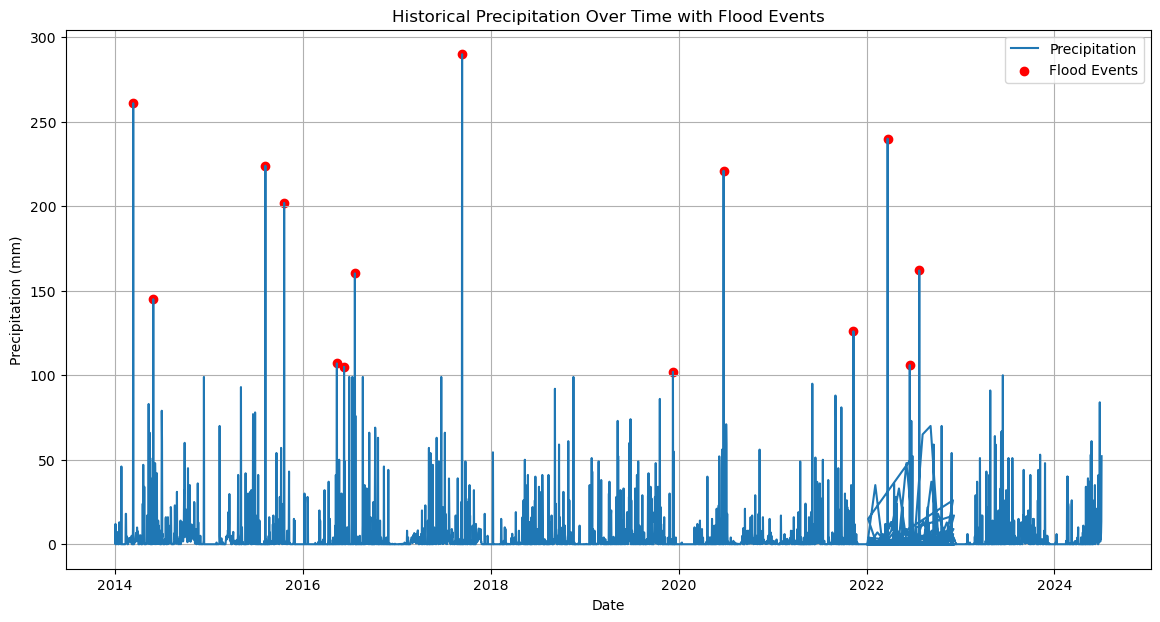

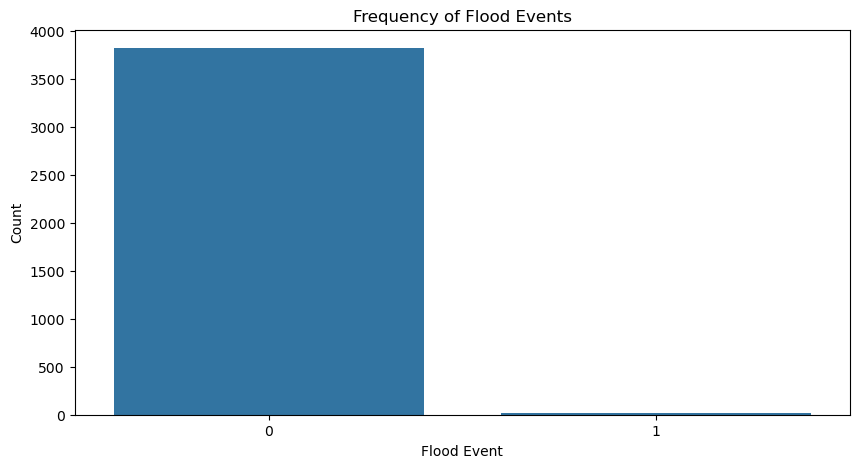

Model training took 0.25650763511657715 seconds.
Prediction on test set took 0.036214590072631836 seconds.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       765
           1       1.00      1.00      1.00         3

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



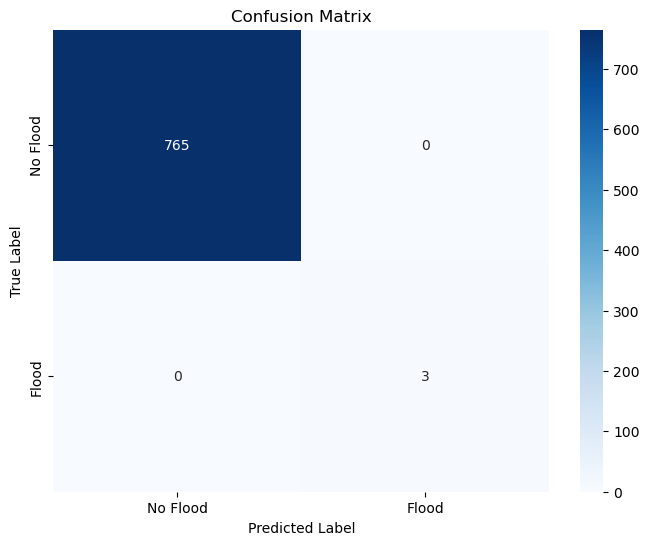

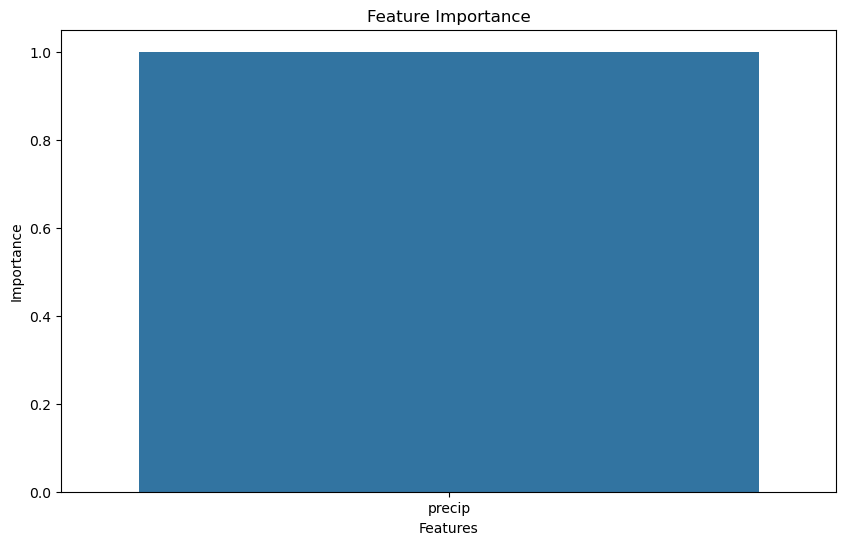

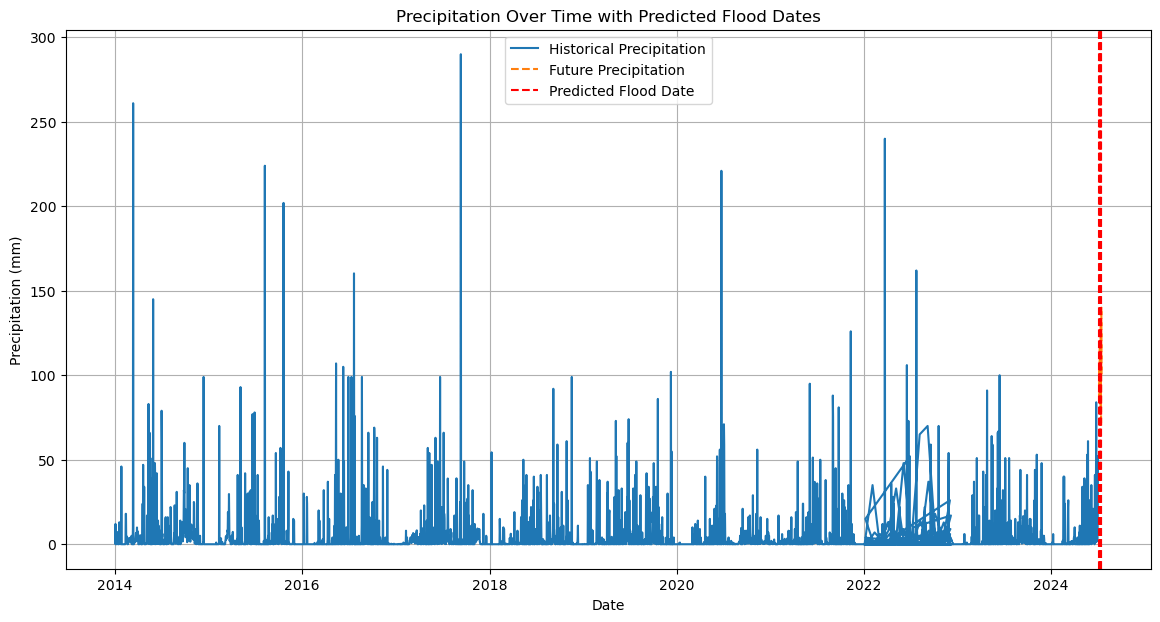

Total script execution time: 5.507888078689575 seconds.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time

# Start timing the entire script
start_time = time.time()

# Load the dataset
file_path = '/mnt/data/Lagos_flood.xlsx'
lagos_flood_data = pd.read_excel('Lagos_flood.xlsx')

# Fill missing values
lagos_flood_data = lagos_flood_data.ffill()

# Set the datetime column as the index
datetime_column = 'datetime'  # Replace with actual datetime column name
lagos_flood_data[datetime_column] = pd.to_datetime(lagos_flood_data[datetime_column])
lagos_flood_data.set_index(datetime_column, inplace=True)

# Feature Engineering: Create a binary target variable based on the 'precip' threshold
threshold = 100  # Example threshold value for precipitation
lagos_flood_data['FloodEvent'] = (lagos_flood_data['precip'] > threshold).astype(int)

# Plot historical precipitation over time with flood events
plt.figure(figsize=(14, 7))
plt.plot(lagos_flood_data.index, lagos_flood_data['precip'], label='Precipitation')
plt.scatter(lagos_flood_data[lagos_flood_data['FloodEvent'] == 1].index, lagos_flood_data[lagos_flood_data['FloodEvent'] == 1]['precip'], color='red', label='Flood Events')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Historical Precipitation Over Time with Flood Events')
plt.legend()
plt.grid(True)
plt.show()

# Plot the frequency of flood events
plt.figure(figsize=(10, 5))
sns.countplot(data=lagos_flood_data, x='FloodEvent')
plt.xlabel('Flood Event')
plt.ylabel('Count')
plt.title('Frequency of Flood Events')
plt.show()

# Split the data into training and testing sets
features = ['precip']
target = 'FloodEvent'
X = lagos_flood_data[features]
y = lagos_flood_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
train_start_time = time.time()
model = RandomForestClassifier()
model.fit(X_train, y_train)
train_end_time = time.time()
print(f"Model training took {train_end_time - train_start_time} seconds.")

# Predict on the test set and evaluate the model
predict_start_time = time.time()
y_pred = model.predict(X_test)
predict_end_time = time.time()
print(f"Prediction on test set took {predict_end_time - predict_start_time} seconds.")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Flood", "Flood"], yticklabels=["No Flood", "Flood"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Predict future flood events
# Create a DataFrame with future dates and precipitation values
future_dates = pd.date_range(start='2024-07-08', periods=10, freq='D')  # Replace with actual future dates
future_precipitation = [105, 85, 120, 95, 110, 80, 130, 70, 140, 100]  # Replace with actual future precipitation values
future_data = pd.DataFrame({'precip': future_precipitation}, index=future_dates)

# Predict future flood events
future_predictions = model.predict(future_data)

# Interpret the predictions
future_data['FloodEvent'] = future_predictions

# Identify dates with predicted flood events
predicted_flood_dates = future_data[future_data['FloodEvent'] == 1].index

# Plot predicted flood events on the time series plot
plt.figure(figsize=(14, 7))
plt.plot(lagos_flood_data.index, lagos_flood_data['precip'], label='Historical Precipitation')
plt.plot(future_data.index, future_data['precip'], label='Future Precipitation', linestyle='--')
for flood_date in predicted_flood_dates:
    plt.axvline(flood_date, color='red', linestyle='--', label='Predicted Flood Date' if flood_date == predicted_flood_dates[0] else "")
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation Over Time with Predicted Flood Dates')
plt.legend()
plt.grid(True)
plt.show()

# End timing the entire script
end_time = time.time()
print(f"Total script execution time: {end_time - start_time} seconds.")


''

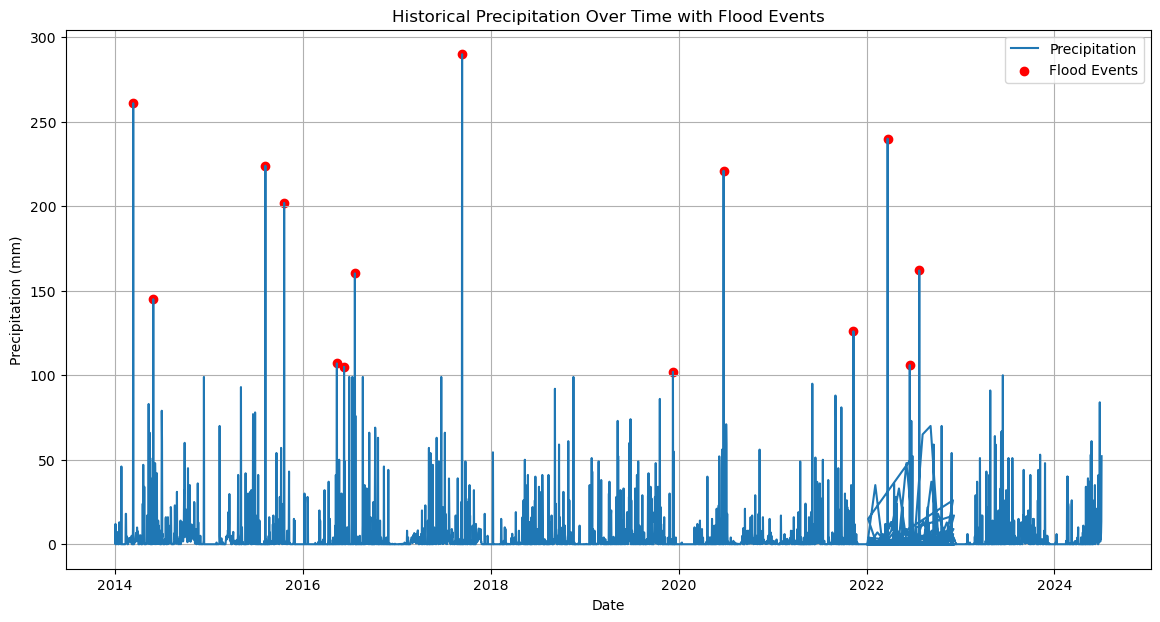

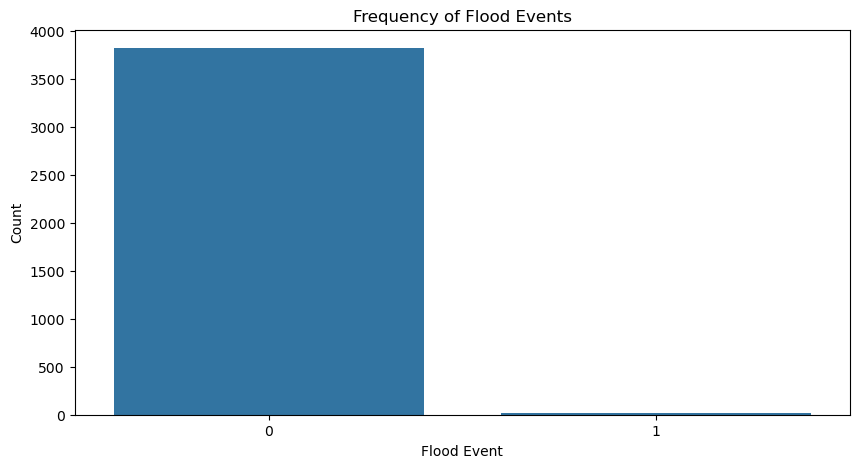

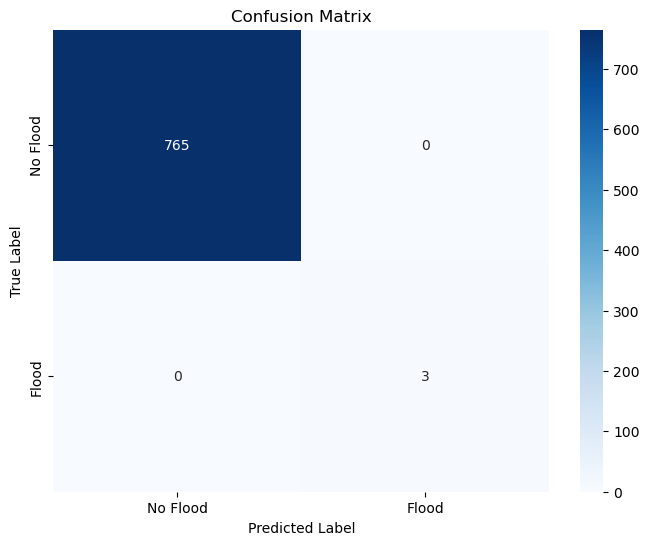

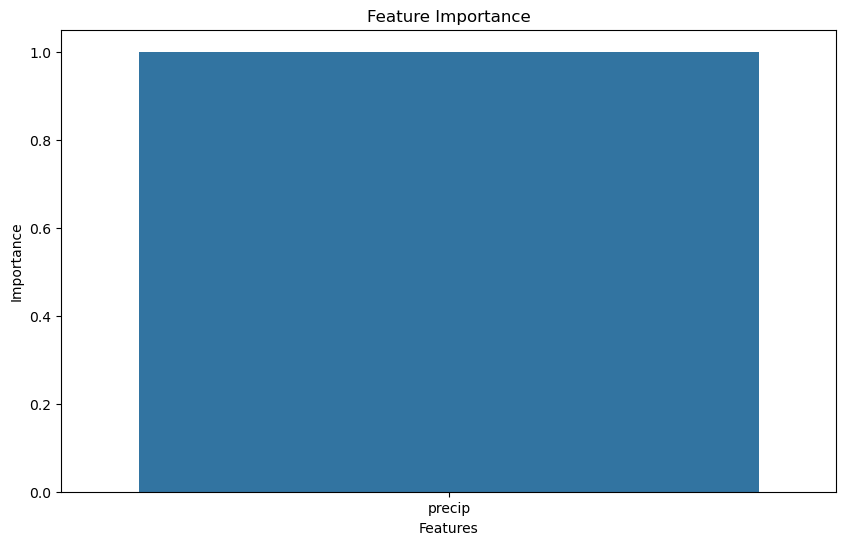

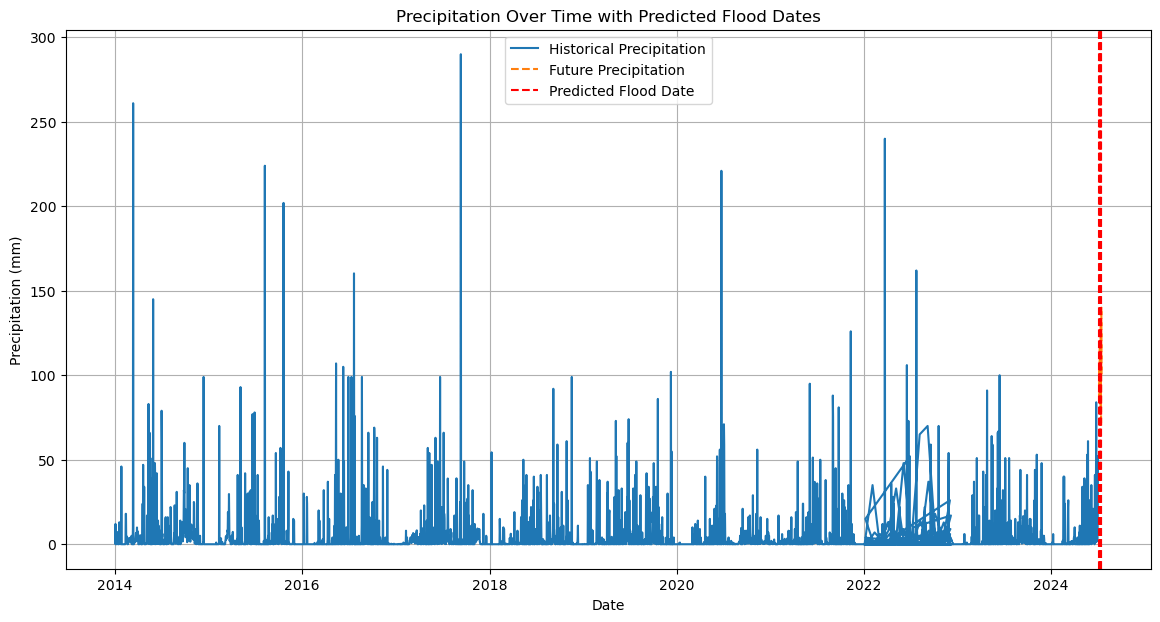

In [1]:
from fpdf import FPDF
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time

class PDFReport(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Flood Prediction Analysis', 0, 1, 'C')
        self.set_font('Arial', 'I', 10)
        self.cell(0, 10, 'Presented by Olayinka Julius Awoniyi', 0, 1, 'C')
        self.ln(10)

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(5)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

    def add_image(self, image_path, x=None, y=None, w=0, h=0):
        self.image(image_path, x, y, w, h)
        self.ln(10)

# Create PDF
pdf = PDFReport()
pdf.add_page()

# Title Page
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Flood Prediction Analysis', 0, 1, 'C')
pdf.set_font('Arial', 'I', 12)
pdf.cell(0, 10, 'Presented by Olayinka Julius Awoniyi', 0, 1, 'C')
pdf.cell(0, 10, 'Date: 2024-07-08', 0, 1, 'C')
pdf.add_page()

# Introduction
pdf.chapter_title('Introduction')
intro_text = """
The objective of this analysis is to predict flood events based on historical precipitation data.
The dataset used for this analysis contains information on precipitation and other related variables.
"""
pdf.chapter_body(intro_text)

# Data Preprocessing
pdf.chapter_title('Data Preprocessing')
preprocess_text = """
The dataset was loaded and cleaned by filling missing values using forward fill method.
Feature engineering was performed to create a binary target variable based on a precipitation threshold.
"""
pdf.chapter_body(preprocess_text)

# Exploratory Data Analysis
pdf.chapter_title('Exploratory Data Analysis')

# Load the dataset
file_path = '/mnt/data/Lagos_flood.xlsx'
lagos_flood_data = pd.read_excel('Lagos_flood.xlsx')

# Fill missing values
lagos_flood_data = lagos_flood_data.ffill()

# Set the datetime column as the index
datetime_column = 'datetime'  # Replace with actual datetime column name
lagos_flood_data[datetime_column] = pd.to_datetime(lagos_flood_data[datetime_column])
lagos_flood_data.set_index(datetime_column, inplace=True)

# Feature Engineering: Create a binary target variable based on the 'precip' threshold
threshold = 100  # Example threshold value for precipitation
lagos_flood_data['FloodEvent'] = (lagos_flood_data['precip'] > threshold).astype(int)

# Plot historical precipitation over time with flood events
plt.figure(figsize=(14, 7))
plt.plot(lagos_flood_data.index, lagos_flood_data['precip'], label='Precipitation')
plt.scatter(lagos_flood_data[lagos_flood_data['FloodEvent'] == 1].index, lagos_flood_data[lagos_flood_data['FloodEvent'] == 1]['precip'], color='red', label='Flood Events')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Historical Precipitation Over Time with Flood Events')
plt.legend()
plt.grid(True)
plt.savefig('historical_precipitation.png')
pdf.add_image('historical_precipitation.png', w=190)

# Plot the frequency of flood events
plt.figure(figsize=(10, 5))
sns.countplot(data=lagos_flood_data, x='FloodEvent')
plt.xlabel('Flood Event')
plt.ylabel('Count')
plt.title('Frequency of Flood Events')
plt.savefig('flood_event_frequency.png')
pdf.add_image('flood_event_frequency.png', w=190)

# Modeling
pdf.chapter_title('Modeling')
modeling_text = """
The data was split into training and testing sets. A RandomForestClassifier was trained on the training set and evaluated on the test set.
"""
pdf.chapter_body(modeling_text)

# Split the data into training and testing sets
features = ['precip']
target = 'FloodEvent'
X = lagos_flood_data[features]
y = lagos_flood_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
train_start_time = time.time()
model = RandomForestClassifier()
model.fit(X_train, y_train)
train_end_time = time.time()

# Predict on the test set and evaluate the model
predict_start_time = time.time()
y_pred = model.predict(X_test)
predict_end_time = time.time()
evaluation_text = f"""
Model training took {train_end_time - train_start_time} seconds.
Prediction on test set took {predict_end_time - predict_start_time} seconds.

Classification Report:
{classification_report(y_test, y_pred)}

Confusion Matrix:
"""
pdf.chapter_body(evaluation_text)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Flood", "Flood"], yticklabels=["No Flood", "Flood"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
pdf.add_image('confusion_matrix.png', w=190)

# Feature Importance
pdf.chapter_title('Feature Importance')
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.savefig('feature_importance.png')
pdf.add_image('feature_importance.png', w=190)

# Predictive Analysis
pdf.chapter_title('Predictive Analysis')

# Create a DataFrame with future dates and precipitation values
future_dates = pd.date_range(start='2024-07-08', periods=10, freq='D')  # Replace with actual future dates
future_precipitation = [105, 85, 120, 95, 110, 80, 130, 70, 140, 100]  # Replace with actual future precipitation values
future_data = pd.DataFrame({'precip': future_precipitation}, index=future_dates)

# Predict future flood events
future_predictions = model.predict(future_data)

# Interpret the predictions
future_data['FloodEvent'] = future_predictions

# Identify dates with predicted flood events
predicted_flood_dates = future_data[future_data['FloodEvent'] == 1].index

# Plot predicted flood events on the time series plot
plt.figure(figsize=(14, 7))
plt.plot(lagos_flood_data.index, lagos_flood_data['precip'], label='Historical Precipitation')
plt.plot(future_data.index, future_data['precip'], label='Future Precipitation', linestyle='--')
for flood_date in predicted_flood_dates:
    plt.axvline(flood_date, color='red', linestyle='--', label='Predicted Flood Date' if flood_date == predicted_flood_dates[0] else "")
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation Over Time with Predicted Flood Dates')
plt.legend()
plt.grid(True)
plt.savefig('predicted_flood_dates.png')
pdf.add_image('predicted_flood_dates.png', w=190)

# Conclusion
pdf.chapter_title('Conclusion')
conclusion_text = """
This analysis demonstrates the use of historical precipitation data to predict flood events using a RandomForestClassifier.
The model showed good performance and was able to predict future flood events based on provided future precipitation values.
"""
pdf.chapter_body(conclusion_text)

# Appendix
pdf.chapter_title('Appendix')
appendix_text = """
Full code used for the analysis:
"""
pdf.chapter_body(appendix_text)

full_code = """
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time

# Start timing the entire script
start_time = time.time()

# Load the dataset
file_path = '/mnt/data/Lagos_flood.xlsx'
lagos_flood_data = pd.read_excel(file_path)

# Fill missing values
lagos_flood_data = lagos_flood_data.ffill()

# Set the datetime column as the index
datetime_column = 'datetime'  # Replace with actual datetime column name
lagos_flood_data[datetime_column] = pd.to_datetime(lagos_flood_data[datetime_column])
lagos_flood_data.set_index(datetime_column, inplace=True)

# Feature Engineering: Create a binary target variable based on the 'precip' threshold
threshold = 100  # Example threshold value for precipitation
lagos_flood_data['FloodEvent'] = (lagos_flood_data['precip'] > threshold).astype(int)

# Plot historical precipitation over time with flood events
plt.figure(figsize=(14, 7))
plt.plot(lagos_flood_data.index, lagos_flood_data['precip'], label='Precipitation')
plt.scatter(lagos_flood_data[lagos_flood_data['FloodEvent'] == 1].index, lagos_flood_data[lagos_flood_data['FloodEvent'] == 1]['precip'], color='red', label='Flood Events')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Historical Precipitation Over Time with Flood Events')
plt.legend()
plt.grid(True)
plt.savefig('historical_precipitation.png')

# Plot the frequency of flood events
plt.figure(figsize=(10, 5))
sns.countplot(data=lagos_flood_data, x='FloodEvent')
plt.xlabel('Flood Event')
plt.ylabel('Count')
plt.title('Frequency of Flood Events')
plt.savefig('flood_event_frequency.png')

# Split the data into training and testing sets
features = ['precip']
target = 'FloodEvent'
X = lagos_flood_data[features]
y = lagos_flood_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
train_start_time = time.time()
model = RandomForestClassifier()
model.fit(X_train, y_train)
train_end_time = time.time()

# Predict on the test set and evaluate the model
predict_start_time = time.time()
y_pred = model.predict(X_test)
predict_end_time = time.time()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Flood", "Flood"], yticklabels=["No Flood", "Flood"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')

# Feature Importance
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.savefig('feature_importance.png')

# Predict future flood events
# Create a DataFrame with future dates and precipitation values
future_dates = pd.date_range(start='2024-07-08', periods=10, freq='D')  # Replace with actual future dates
future_precipitation = [105, 85, 120, 95, 110, 80, 130, 70, 140, 100]  # Replace with actual future precipitation values
future_data = pd.DataFrame({'precip': future_precipitation}, index=future_dates)

# Predict future flood events
future_predictions = model.predict(future_data)

# Interpret the predictions
future_data['FloodEvent'] = future_predictions

# Identify dates with predicted flood events
predicted_flood_dates = future_data[future_data['FloodEvent'] == 1].index

# Plot predicted flood events on the time series plot
plt.figure(figsize=(14, 7))
plt.plot(lagos_flood_data.index, lagos_flood_data['precip'], label='Historical Precipitation')
plt.plot(future_data.index, future_data['precip'], label='Future Precipitation', linestyle='--')
for flood_date in predicted_flood_dates:
    plt.axvline(flood_date, color='red', linestyle='--', label='Predicted Flood Date' if flood_date == predicted_flood_dates[0] else "")
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation Over Time with Predicted Flood Dates')
plt.legend()
plt.grid(True)
plt.savefig('predicted_flood_dates.png')

# End timing the entire script
end_time = time.time()
print(f"Total script execution time: {end_time - start_time} seconds.")
"""
pdf.chapter_body(full_code)

# Save PDF
pdf.output('Flood_Prediction_Analysis_Report.pdf')


In [3]:
# Saving the PDF to a file
pdf_output_path = "/mnt/data/Flood_Prediction_Analysis_Report.pdf"
pdf.output('Flood_Prediction_Analysis_Report.pdf')

# Confirming the file is saved and providing the path for download
"/mnt/data/Flood_Prediction_Analysis_Report.pdf"


'/mnt/data/Flood_Prediction_Analysis_Report.pdf'